In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

- ### n_samples=100 задает общее количество сгенерированных точек данных равным 100.
- ### centers=N указывает количество центров кластеров, которые будут сгенерированы. В данном случае у нас 2 центра.
- ### n_features=D определяет количество признаков (размерность) для каждой точки данных. Здесь у нас 6 признаков.
- ### random_state=1 гарантирует, что генерируемые данные будут воспроизводимыми.
- ### cluster_std=6 ** 0.5 определяет стандартное отклонение кластеров, которые будут сгенерированы.

In [98]:
from sklearn.datasets import make_blobs

N = 2
D = 6


# Генерация данных
X, y = make_blobs(n_samples=100, centers=N, n_features=D, random_state=1, cluster_std=6 ** 0.5)

# Разделение данных на обучающую и тестовую выборки:
# test_size=0.5 указывает, что 50% данных будет использовано для
# тестирования модели, а оставшиеся 50% будут использованы для обучения.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# pd.DataFrame(X_train) создает DataFrame из массива признаков X_train.
df = pd.DataFrame(X_train)

# df['Class'] = y_train добавляет столбец Class в DataFrame, содержащий целевые метки из y_train.
df['Class'] = y_train

In [99]:
# создание графика совместных диаграмм пар признаков
# в DataFrame df с раскраской точек по классам.
sns.pairplot(df, hue='Class')

- ### criterion="gini" указывает критерий, используемый для разделения узлов дерева. В данном случае используется критерий Джини.
- ### min_samples_split=10 задает минимальное количество образцов, необходимых для разделения внутреннего узла. Если количество образцов в узле меньше этого значения, то разделение не будет производиться.
- ### max_depth=5 ограничивает максимальную глубину дерева до 5 уровней. Это помогает предотвратить переобучение модели.

In [100]:
# создает объект модели классификатора дерева решений с определенными параметрами:
model = tree.DecisionTreeClassifier(criterion="gini", min_samples_split=10, max_depth=5)

# model.fit(X_train, y_train) обучает модель на обучающих данных X_train и соответствующих целевых метках y_train.
# Обучение модели означает, что модель "изучает" связи между признаками и целевыми метками в обучающем наборе данных,
# чтобы в дальнейшем использовать эту информацию для предсказания классов для новых, неизвестных данных.
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

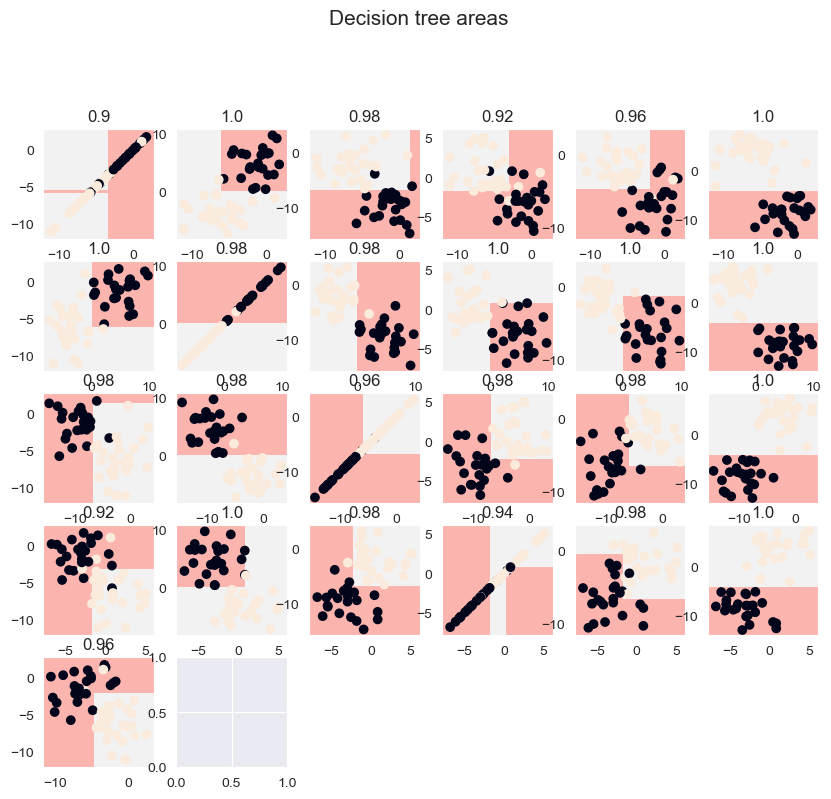

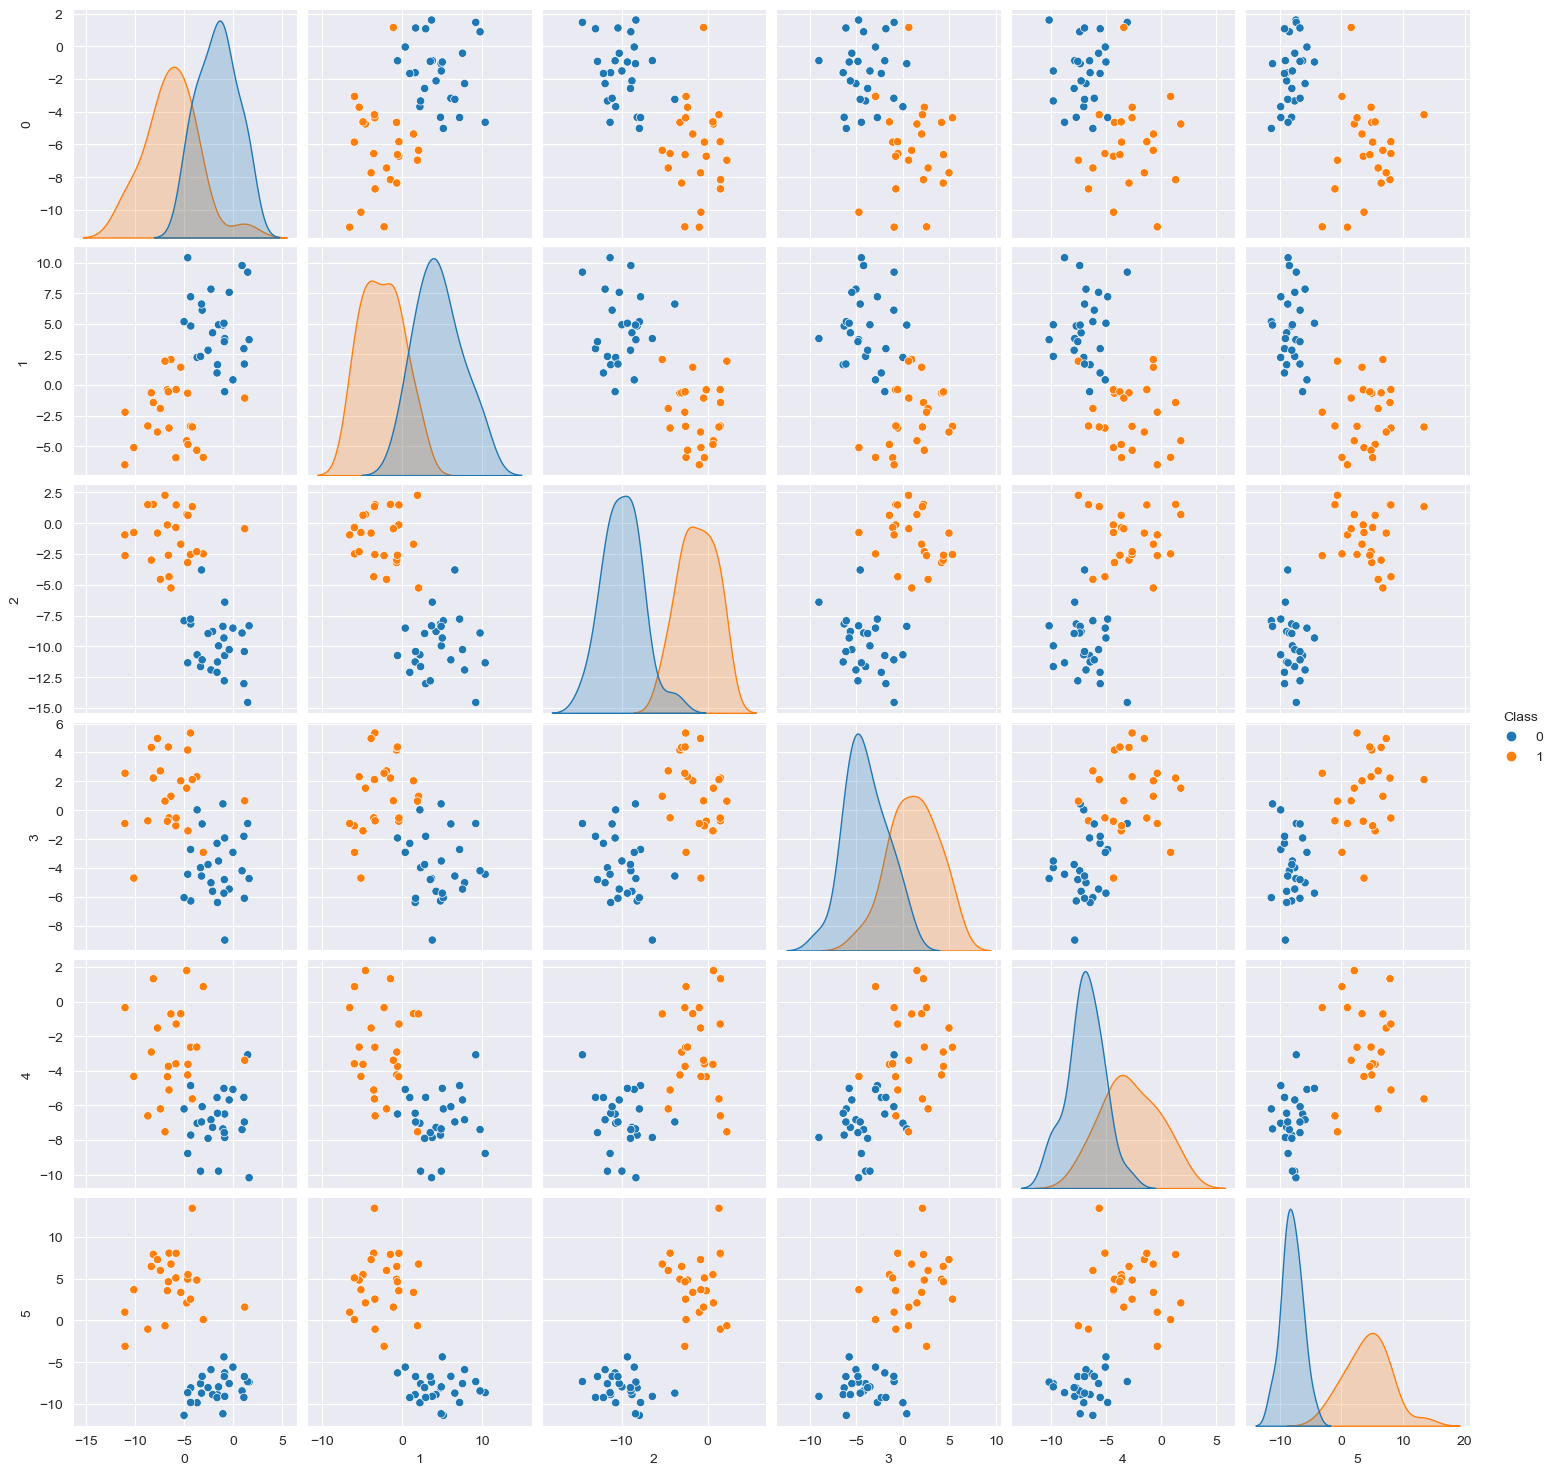

<Figure size 1200x1200 with 0 Axes>

In [101]:
plt.figure(figsize=(12, 12))
plt.show()

## Пояснение атрибутов узла дерева решений:

##### X[..] <= ....: Это условие представляет разделение данных на данном узле. Оно говорит о том, что для примера данных в узле значение признака X[..] (признак с индексом ..) должно быть меньше или равно ...., чтобы попасть в левое поддерево. Если условие не выполняется, данные будут идти в правое поддерево.
##### gini = ...: Это значение Gini-индекса для данного узла. Gini-индекс - это мера неопределенности или разнородности классов в узле. Значение ... указывает на степень разнородности классов в данном узле. Более высокие значения Gini-индекса указывают на более смешанные классы в узле.
##### samples = ...: Это количество образцов (примеров данных), которые попали в данный узел. Значение ... говорит о том, что в узле находится ... примеров данных.
##### Values = [..., ......]: Это список значений классов для примеров данных в данном узле. В данном случае, значения классов указывают на ... примеров данных, относящихся к одному классу, и .... примеров данных, относящихся к другому классу.

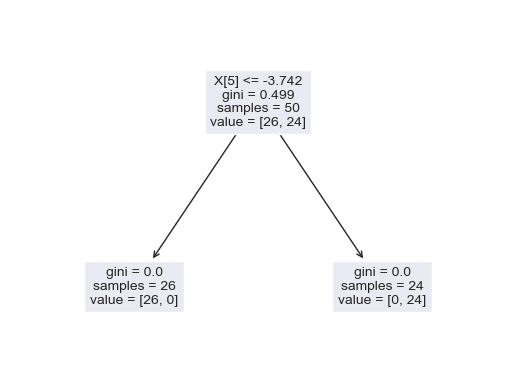

In [102]:
tree.plot_tree(model, fontsize=10)
plt.show()

In [103]:
# Функция DT(field1, field2, k) принимает входные аргументы field1, field2 и k и выполняет следующие действия:
def DT(field1, field2, k):
    # Создает subplot для размещения графика:
    splot = plt.subplot(D, D, k)

    # Извлекает значения признаков field1 и field2 из DataFrame df:
    x = df[[field1, field2]].values

    # Добавляет столбец Class с целевыми метками y_train в DataFrame df:
    df['Class'] = y_train

    # Создает и обучает модель дерева решений на основе признаков x и целевых меток y_train:
    model_pair = tree.DecisionTreeClassifier(criterion="gini", min_samples_split=10, max_depth=5)
    model_pair.fit(x, y_train)

    # Определяет минимальные и максимальные значения для field1 и field2:
    min1, max1 = df[field1].min() - 1, df[field1].max() + 1
    min2, max2 = df[field2].min() - 1, df[field2].max() + 1

    # Создает сетку значений X и Y для графика:
    X = np.linspace(min1, max1, 200)
    Y = np.linspace(min2, max2, 200)
    X, Y = np.meshgrid(X, Y)

    # Предсказывает классы для каждой точки в сетке с помощью модели model_pair:
    ZZ = np.array([model_pair.predict(np.array([[xx, yy]])) for xx, yy in zip(np.ravel(X), np.ravel(Y))])
    Z = ZZ.reshape(X.shape)

    # Создает график с использованием pcolormesh() для отображения предсказанных классов:
    plt.pcolormesh(X, Y, Z, cmap='Pastel1')

    # Рисует точки данных на графике и раскрашивает их в соответствии с их истинными классами:
    plt.scatter(df[field1], df[field2], c=y_train)

    # Устанавливает заголовок графика как значение точности модели на обучающих данных:
    plt.title(model_pair.score(x, y_train))
    return splot

### Этот код создает графики дерева решений для каждой комбинации пар признаков и отображает их на сетке.

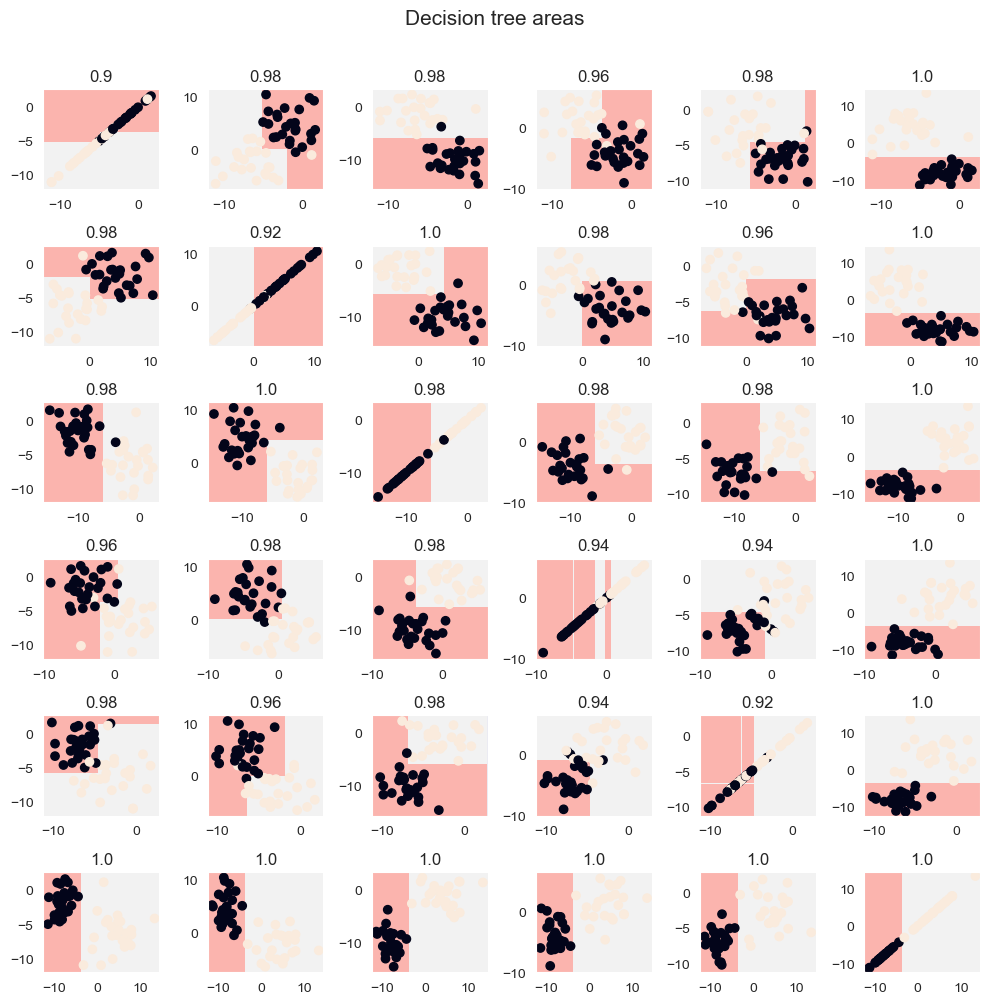

In [104]:
# Создание графика с заданным размером и белым фоном
plt.figure(figsize=(10, 10), facecolor='white')

# Установка заголовка для всего графика:
plt.suptitle('Decision tree areas', y=1, fontsize=15)

# Инициализация переменной k в нулевое значение:
k = 0

# Итерации по комбинациям пар признаков:
# В каждой итерации:
# i и j перебирают значения от 0 до D-1, представляя индексы признаков для текущей комбинации.
# k увеличивается на 1 для отслеживания текущего номера графика.
# Вызывается функция DT(i, j, k), которая создает и возвращает subplot с диаграммой дерева решений для пары признаков (i, j).
for i in range(D):
    for j in range(D):
        k = k + 1
        splot = DT(i, j, k)

# Установка оптимального расположения подграфиков на рисунке:
plt.tight_layout()
plt.subplots_adjust(top=0.92)

# Отображение графика на экране:
plt.show()

## Код model.score(X_test, y_test) используется для оценки точности модели model на тестовых данных X_test и соответствующих целевых метках y_test.

In [105]:
# accuracy будет содержать значение точности модели на тестовых данных
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.98


- ### Сделать лес и дерево решений
- ### на выборке (гит репозитории), построить классификационное дерево решений и лес деревьев решений (random forest),
- ### понимать алгоритм построения.
- ### На этой выборке применить для выявления выбросов isolation forest
- ### изобразить изоляционное дерево.

In [106]:
# !pip install dtreeviz

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import dtreeviz.trees

# Создание случайного леса
forest = RandomForestClassifier(n_estimators=10)
forest.fit(X_train, y_train)

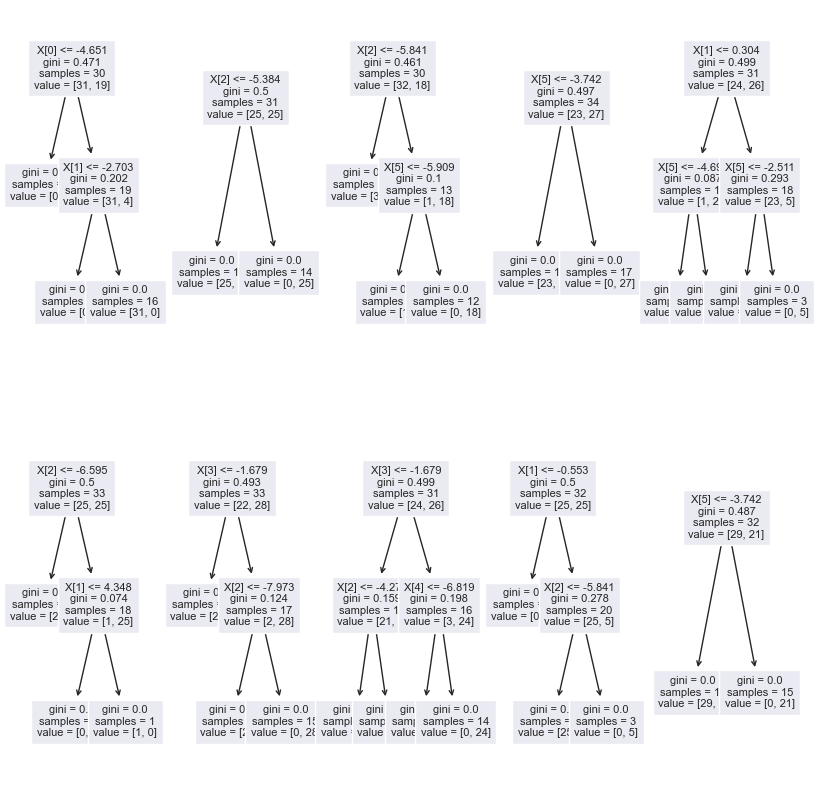

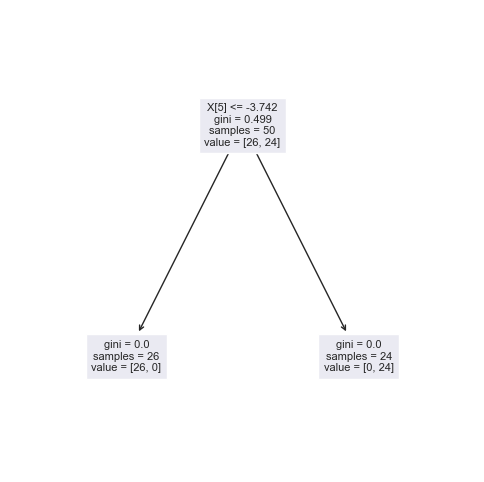

TypeError: 'module' object is not callable

In [ ]:


# Создание дерева решений
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Визуализация случайного леса
plt.figure(figsize=(10, 10))
for i, tree_in_forest in enumerate(forest.estimators_):
    plt.subplot(2, 5, i+1)
    tree.plot_tree(tree_in_forest, fontsize=8)
plt.show()

# Визуализация дерева решений
plt.figure(figsize=(6, 6))
tree.plot_tree(decision_tree, fontsize=8)
plt.show()

# Визуализация дерева решений с помощью dtreeviz
viz = dtreeviz(decision_tree, X_train, y_train, target_name='Class', feature_names=df.columns[:-1])
viz.view()
